In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import figure
import os


font = {'size': 13}
plt.rc('font', **font)




path = os.path.abspath("C:/Users/steve/Google Drive/Master/Masterarbet/Evaluation/graphics/disruption")




CPURAMdataWithBothVM1 = pd.read_csv('CPURAMdataVM2WithBothMTD.txt')
CPURAMdataWithoutMTDVM1 = pd.read_csv('CPURAMdataVM2WithoutMTD.txt')



CPURAMdataWithBothVM1 = CPURAMdataWithBothVM1.iloc[800:3000]
CPURAMdataWithoutMTDVM1 = CPURAMdataWithoutMTDVM1.iloc[700:3000]

CPURAMdataWithBothVM1 = CPURAMdataWithBothVM1.reset_index(drop=True)
CPURAMdataWithoutMTDVM1 = CPURAMdataWithoutMTDVM1.reset_index(drop=True)


print(CPURAMdataWithBothVM1)
print(CPURAMdataWithoutMTDVM1)

         time  CPUPerc  RAMPerc  RAMAvailable    RAMTotal  BashliteActive
0    15:31:14     33.7     16.9    3080527872  3706793984           False
1    15:31:16     21.9     16.9    3080527872  3706793984           False
2    15:31:18     23.5     16.9    3080527872  3706793984           False
3    15:31:20     41.8     16.9    3080785920  3706793984           False
4    15:31:22     23.5     16.9    3080785920  3706793984           False
..        ...      ...      ...           ...         ...             ...
907  16:01:49     25.8     16.9    3081293824  3706793984           False
908  16:01:51     24.7     16.9    3081293824  3706793984           False
909  16:01:53     30.5     16.9    3081293824  3706793984           False
910  16:01:55     39.8     16.9    3081551872  3706793984           False
911  16:01:57    100.0     16.9    3082166272  3706793984           False

[912 rows x 6 columns]
         time  CPUPerc  RAMPerc  RAMAvailable    RAMTotal  BashliteActive
0    20:21:51 

In [2]:
from datetime import datetime

newTime = []

def getSeconds(timeValue):
    timeArray = timeValue.split(":")
    numSeconds = int(timeArray[0])*3600 + int(timeArray[1]) * 60 + int(timeArray[2])
    return numSeconds
    
startTime = getSeconds(CPURAMdataWithBothVM1["time"][0])


for i,timeValue in enumerate(CPURAMdataWithBothVM1["time"]):
    timeDif = getSeconds(timeValue) - startTime
    newTime.append(timeDif)
    

The RAM mean with Bashlite running is: nan
The highest Ram value  is: 100.0
The lowest Ram value  is: 17.9
The RAM mean with Bashlite not unning is: 24.219078947368438


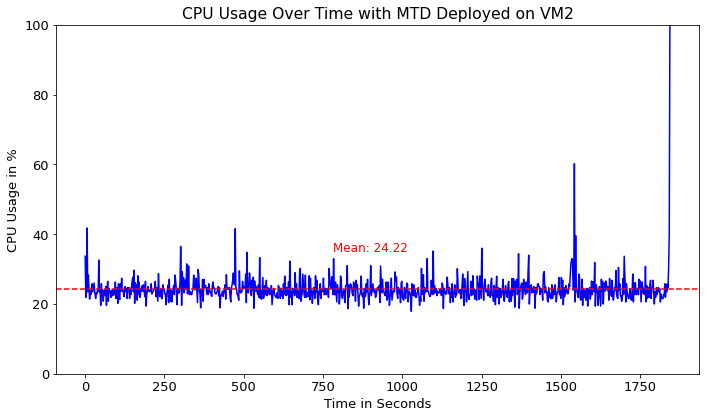

In [3]:
import matplotlib.pyplot as plt

CPURAMdataWithBothVM1["time"] = newTime

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(CPURAMdataWithBothVM1['time'], CPURAMdataWithBothVM1['CPUPerc'], c='blue')
bashliteRunningMean = CPURAMdataWithBothVM1[CPURAMdataWithBothVM1['BashliteActive'] == True]['CPUPerc'].mean()
bashliteNotRunningMean = CPURAMdataWithBothVM1[CPURAMdataWithBothVM1['BashliteActive'] == False]['CPUPerc'].mean()

highestValueRAM = 0
lowestValueRAM = 100

for index, row in CPURAMdataWithBothVM1.iterrows():
    if row["CPUPerc"] > highestValueRAM:
        highestValueRAM = row["CPUPerc"]
        
    elif row["CPUPerc"] < lowestValueRAM:
        lowestValueRAM = row["CPUPerc"]
    else:
        pass
        


print(f"The RAM mean with Bashlite running is: {bashliteRunningMean}")
print(f"The highest Ram value  is: {highestValueRAM}")
print(f"The lowest Ram value  is: {lowestValueRAM}")
print(f"The RAM mean with Bashlite not unning is: {bashliteNotRunningMean}")


ax.axhline(bashliteNotRunningMean, color='r', linestyle='--', label='mean')


plt.ylim(0, 100)
plt.title('CPU Usage Over Time with MTD Deployed on VM2')
plt.xlabel('Time in Seconds')
plt.ylabel('CPU Usage in %')
ax.text(780, 35, 'Mean: {:.2f}'.format(bashliteNotRunningMean), fontsize=12, color='r')

plt.tight_layout()
filename = "CPUVM2MTDDeployed.png"
plt.savefig(os.path.join(path,filename),dpi= 800)
plt.show()


In [4]:
startTime = getSeconds(CPURAMdataWithoutMTDVM1["time"][0])

newTime = []
for i,timeValue in enumerate(CPURAMdataWithoutMTDVM1["time"]):
    timeDif = getSeconds(timeValue) - startTime
    newTime.append(timeDif)
    
print()

The RAM mean with Bashlite running is: nan
The highest Ram value  is: 100.0
The lowest Ram value  is: 17.9
The RAM mean with Bashlite not unning is: 23.792442497261835


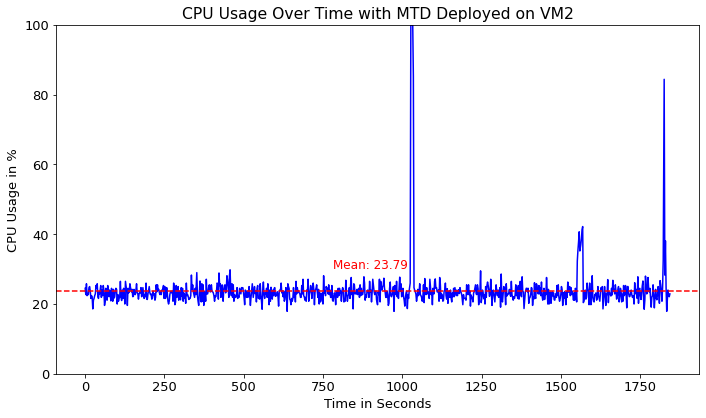

In [5]:
CPURAMdataWithoutMTDVM1["time"] = newTime

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(CPURAMdataWithoutMTDVM1['time'], CPURAMdataWithoutMTDVM1['CPUPerc'], c='blue')
bashliteNotRunningMean = CPURAMdataWithoutMTDVM1[CPURAMdataWithoutMTDVM1['BashliteActive'] == False]['CPUPerc'].mean()

highestValueRAM = 0
lowestValueRAM = 100

for index, row in CPURAMdataWithoutMTDVM1.iterrows():
    if row["CPUPerc"] > highestValueRAM:
        highestValueRAM = row["CPUPerc"]
        
    elif row["CPUPerc"] < lowestValueRAM:
        lowestValueRAM = row["CPUPerc"]
    else:
        pass
        


print(f"The RAM mean with Bashlite running is: {bashliteRunningMean}")
print(f"The highest Ram value  is: {highestValueRAM}")
print(f"The lowest Ram value  is: {lowestValueRAM}")
print(f"The RAM mean with Bashlite not unning is: {bashliteNotRunningMean}")


ax.axhline(bashliteNotRunningMean, color='r', linestyle='--', label='mean')
ax.text(780, 30, 'Mean: {:.2f}'.format(bashliteNotRunningMean), fontsize=12, color='r')


plt.ylim(0, 100)
plt.title('CPU Usage Over Time with MTD Deployed on VM2')
plt.xlabel('Time in Seconds')
plt.ylabel('CPU Usage in %')

plt.tight_layout()
filename = "CPUVM2MTDNotDeployed.png"
plt.savefig(os.path.join(path,filename),dpi= 800)
plt.show()
